In [65]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Exploratory Data Analysis

In [2]:
# Make a list of files for easy iterating
# There are 5000 patient files
patient_files = glob.glob('training/*.psv')
len(patient_files)

5000

In [3]:
# Make the dictionary with first hour of diagnosis of sepsis as keys 
# and number of corresponding people as values 

# Also make a list of files of patients with and without Sepsis

first_hour, sepsis_files, no_sepsis_files = {}, [], []

first_hour['No Sepsis'] = 0
for file in patient_files:
    patient = pd.read_csv(file, sep='|')
    if 1 not in list(patient['SepsisLabel']):
        no_sepsis_files.append(file)
        first_hour['No Sepsis'] += 1
    else:
        sepsis_files.append(file)
        for idx, label in enumerate(patient['SepsisLabel']):
            if label == 1:
                hour = patient.loc[idx]['ICULOS'] 
                if hour not in first_hour:
                    first_hour[hour] = 0
                first_hour[hour] += 1
                break
first_hour

{'No Sepsis': 4721,
 1.0: 56,
 104.0: 2,
 180.0: 1,
 48.0: 2,
 34.0: 2,
 4.0: 5,
 27.0: 6,
 78.0: 2,
 90.0: 3,
 31.0: 1,
 154.0: 1,
 240.0: 1,
 122.0: 2,
 46.0: 2,
 91.0: 1,
 2.0: 6,
 158.0: 1,
 32.0: 4,
 20.0: 2,
 6.0: 5,
 55.0: 2,
 71.0: 2,
 57.0: 1,
 19.0: 4,
 3.0: 7,
 61.0: 3,
 14.0: 6,
 10.0: 1,
 139.0: 2,
 331.0: 1,
 7.0: 8,
 24.0: 5,
 108.0: 1,
 28.0: 3,
 121.0: 1,
 45.0: 3,
 16.0: 3,
 149.0: 1,
 54.0: 2,
 17.0: 2,
 84.0: 4,
 47.0: 3,
 30.0: 5,
 23.0: 4,
 33.0: 2,
 38.0: 2,
 198.0: 2,
 129.0: 1,
 5.0: 4,
 85.0: 1,
 9.0: 4,
 39.0: 3,
 83.0: 2,
 37.0: 2,
 135.0: 1,
 25.0: 2,
 36.0: 1,
 13.0: 5,
 60.0: 1,
 53.0: 2,
 35.0: 2,
 95.0: 1,
 68.0: 1,
 120.0: 1,
 181.0: 1,
 81.0: 2,
 40.0: 3,
 123.0: 2,
 243.0: 1,
 41.0: 1,
 21.0: 1,
 52.0: 2,
 29.0: 1,
 209.0: 1,
 62.0: 1,
 92.0: 2,
 63.0: 1,
 26.0: 3,
 75.0: 1,
 42.0: 1,
 155.0: 1,
 100.0: 1,
 156.0: 1,
 74.0: 1,
 79.0: 1,
 110.0: 2,
 251.0: 1,
 196.0: 1,
 12.0: 2,
 101.0: 1,
 69.0: 1,
 18.0: 2,
 93.0: 1,
 44.0: 1,
 224.0: 1,
 300.0: 1,

In [4]:
# Out of the 5000 patients, there are 279 cases where diagnosis of Sepsis was positive
len(sepsis_files)

279

In [5]:
# Create a new dictionary that further summarizes when the positive 
# patients get diagnosed within the first 20 hours, the next 20 hours, 
# and so on

new_first_hour = defaultdict(int)
for hour in list(first_hour.keys())[1:]:
    if hour <= 19:
        new_first_hour['0-20 Hours'] +=first_hour[hour]
        
    if hour >=20 and hour <= 39:
        new_first_hour['20-40 Hours'] +=first_hour[hour]
    
    if hour >=40 and hour <= 59:
        new_first_hour['40-60 Hours'] +=first_hour[hour]
    
    if hour >=60 and hour <= 79:
        new_first_hour['60-80 Hours'] +=first_hour[hour]
    
    if hour >=80 and hour <= 99:
        new_first_hour['80-100 Hours'] +=first_hour[hour]
    
    if hour >=100 and hour <= 119:
        new_first_hour['100-119 Hours'] +=first_hour[hour]
    
    if hour >=120 and hour <= 139:
        new_first_hour['120-140 Hours'] +=first_hour[hour]
    
    if hour >=140 and hour <= 159:
        new_first_hour['140-160 Hours'] +=first_hour[hour]
    
    if hour >=160 and hour <= 179:
        new_first_hour['160-180 Hours'] +=first_hour[hour]
    
    if hour >=180 and hour <= 199:
        new_first_hour['180-200 Hours'] +=first_hour[hour]
    
    if hour >=200:
        new_first_hour['200+ Hours'] +=first_hour[hour]
        
new_first_hour

defaultdict(int,
            {'0-20 Hours': 123,
             '100-119 Hours': 10,
             '180-200 Hours': 6,
             '40-60 Hours': 28,
             '20-40 Hours': 51,
             '60-80 Hours': 17,
             '80-100 Hours': 19,
             '140-160 Hours': 5,
             '200+ Hours': 10,
             '120-140 Hours': 10})

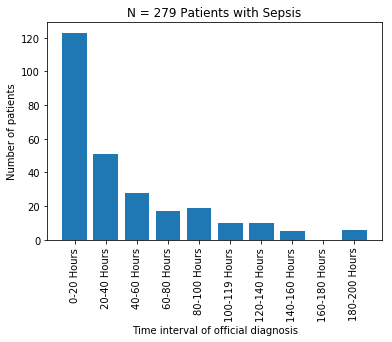

In [6]:
# Bar plot that shows how many hours after ICU admission do patients get official sepsis diagnosis

order = ['0-20 Hours', '20-40 Hours', '40-60 Hours', '60-80 Hours', '80-100 Hours',
        '100-119 Hours', '120-140 Hours', '140-160 Hours', '160-180 Hours', '180-200 Hours']
count = [new_first_hour[interval] for interval in order]

plt.bar(order,count)
plt.xticks(rotation=90)
plt.title('N = 279 Patients with Sepsis')
plt.xlabel('Time interval of official diagnosis')
plt.ylabel('Number of patients')
plt.show()

In [7]:
# EXAMPLE 
test = pd.read_csv(sepsis_files[20], sep='|')
test

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,1,0
1,112.0,89.0,NaN,142.0,121.0,96.0,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,2,0
2,108.0,89.0,NaN,127.0,86.0,70.0,23.0,NaN,NaN,NaN,...,12.7,NaN,167.0,67,0,1,0,-0.12,3,0
3,106.0,89.5,NaN,107.5,89.5,73.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,4,0
4,105.0,85.0,NaN,117.5,92.0,75.0,33.5,NaN,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,5,0
5,116.0,85.0,NaN,99.0,88.0,76.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,6,1
6,106.0,86.0,NaN,111.0,60.0,45.0,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,7,1
7,110.0,83.0,36.8,119.0,96.0,79.0,38.0,NaN,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,8,1
8,117.0,93.5,36.7,108.5,87.0,65.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,9,1
9,126.0,83.0,37.2,127.5,78.0,67.5,19.0,35.0,NaN,NaN,...,NaN,NaN,NaN,67,0,1,0,-0.12,10,1


In [8]:
test.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [9]:
# Ignore for now (trend features)

TS_features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']
MV_features = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

simple = test[TS_features]
simple['SepsisLabel'] = test['SepsisLabel']
simple

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,112.0,89.0,NaN,142.0,121.0,96.0,26.0,NaN,0
2,108.0,89.0,NaN,127.0,86.0,70.0,23.0,NaN,0
3,106.0,89.5,NaN,107.5,89.5,73.0,NaN,NaN,0
4,105.0,85.0,NaN,117.5,92.0,75.0,33.5,NaN,0
5,116.0,85.0,NaN,99.0,88.0,76.0,32.0,NaN,1
6,106.0,86.0,NaN,111.0,60.0,45.0,36.0,NaN,1
7,110.0,83.0,36.8,119.0,96.0,79.0,38.0,NaN,1
8,117.0,93.5,36.7,108.5,87.0,65.5,NaN,NaN,1
9,126.0,83.0,37.2,127.5,78.0,67.5,19.0,35.0,1


In [119]:
# Ignore for now (trend features)

for column in TS_features:
    simple[column].fillna((test[column].mean()), inplace=True)
    simple[str(column)+'_lag'] = simple[column].shift()
    simple[str(column)+'_rolling'] = simple[column].rolling(3).mean()
simple

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,SepsisLabel,HR_lag,...,SBP_lag,SBP_rolling,MAP_lag,MAP_rolling,DBP_lag,DBP_rolling,Resp_lag,Resp_rolling,EtCO2_lag,EtCO2_rolling
0,116.642857,89.642857,37.066667,112.071429,84.892857,68.821429,27.5,37.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112.000000,89.000000,37.066667,142.000000,121.000000,96.000000,26.0,37.0,0,116.642857,...,112.071429,NaN,84.892857,NaN,68.821429,NaN,27.5,NaN,37.0,NaN
2,108.000000,89.000000,37.066667,127.000000,86.000000,70.000000,23.0,37.0,0,112.000000,...,142.000000,127.023810,121.000000,97.297619,96.000000,78.273810,26.0,25.500000,37.0,37.000000
3,106.000000,89.500000,37.066667,107.500000,89.500000,73.000000,27.5,37.0,0,108.000000,...,127.000000,125.500000,86.000000,98.833333,70.000000,79.666667,23.0,25.500000,37.0,37.000000
4,105.000000,85.000000,37.066667,117.500000,92.000000,75.000000,33.5,37.0,0,106.000000,...,107.500000,117.333333,89.500000,89.166667,73.000000,72.666667,27.5,28.000000,37.0,37.000000
5,116.000000,85.000000,37.066667,99.000000,88.000000,76.000000,32.0,37.0,1,105.000000,...,117.500000,108.000000,92.000000,89.833333,75.000000,74.666667,33.5,31.000000,37.0,37.000000
6,106.000000,86.000000,37.066667,111.000000,60.000000,45.000000,36.0,37.0,1,116.000000,...,99.000000,109.166667,88.000000,80.000000,76.000000,65.333333,32.0,33.833333,37.0,37.000000
7,110.000000,83.000000,36.800000,119.000000,96.000000,79.000000,38.0,37.0,1,106.000000,...,111.000000,109.666667,60.000000,81.333333,45.000000,66.666667,36.0,35.333333,37.0,37.000000
8,117.000000,93.500000,36.700000,108.500000,87.000000,65.500000,27.5,37.0,1,110.000000,...,119.000000,112.833333,96.000000,81.000000,79.000000,63.166667,38.0,33.833333,37.0,37.000000
9,126.000000,83.000000,37.200000,127.500000,78.000000,67.500000,19.0,35.0,1,117.000000,...,108.500000,118.333333,87.000000,87.000000,65.500000,70.666667,27.5,28.166667,37.0,36.333333


In [ ]:
# Ignore for now (Handling the missing data)

TS_features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']
MV_features = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

# TS features
for feature in TS_features:
    test[feature].fillna((test[feature].mean()), inplace=True)

# MV features
test[MV_features] = test[MV_features].fillna(method='ffill')
test[MV_features] = test[MV_features].fillna(method='bfill')

test.head()

In [10]:
# Prelim attempt to make a usable dataframe for ML #1
# Handling the missing data

VS_features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']
LV_features = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']


prelim = []

# Create a numerical ID unique associated with each patient
for patientID, file in enumerate(patient_files):
    patient = pd.read_csv(file, sep='|')
    patient['ID'] = patientID
       
    for feature in VS_features:
        # Filling NaN values for VS features with mean
        patient[feature].fillna((patient[feature].mean()), inplace = True)
        
        # Filling NaN values for LV features with ffill/bfill
        patient[LV_features] = patient[LV_features].fillna(method='ffill')
        patient[LV_features] = patient[LV_features].fillna(method='bfill')
    # Create a column with binary outcome of patient, each patient has either all 0s (no sepsis), or 1s, (gets sepsis)
    if 1 not in list(patient['SepsisLabel']):
        patient['Gets_Sepsis'] = 0
    else:
        patient['Gets_Sepsis'] = 1 
    prelim.append(patient)

prelim_df = pd.concat(prelim, ignore_index=True)

In [12]:
# The remaining NaNs are only completely present on entire columns
prelim_df[prelim_df['ID']==3]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Gets_Sepsis
109,87.324324,95.277778,36.61,161.138889,97.614286,65.402778,18.033333,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,1,0,3,0
110,86.000000,95.000000,36.61,176.000000,100.000000,68.000000,16.000000,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,2,0,3,0
111,82.000000,97.000000,36.00,174.000000,96.000000,66.000000,14.000000,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,3,0,3,0
112,88.000000,96.000000,36.61,166.000000,100.000000,70.000000,15.000000,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,4,0,3,0
113,90.000000,95.000000,36.61,174.000000,102.000000,70.000000,16.000000,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,5,0,3,0
114,94.000000,97.000000,36.61,176.000000,98.000000,66.000000,17.000000,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,6,0,3,0
115,90.000000,97.000000,35.90,166.000000,90.000000,60.000000,18.033333,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,7,0,3,0
116,86.000000,96.000000,36.61,160.000000,94.000000,64.000000,12.000000,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,8,0,3,0
117,86.000000,95.000000,36.61,154.000000,92.000000,62.000000,13.000000,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,9,0,3,0
118,84.000000,97.000000,36.61,146.000000,88.000000,60.000000,20.000000,NaN,NaN,NaN,...,162.0,63,1,NaN,NaN,-27.74,10,0,3,0


In [13]:
prelim_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'ID', 'Gets_Sepsis'],
      dtype='object')

In [14]:
prelim_df.shape

(188453, 43)

In [21]:
gets_sepsis = prelim_df[prelim_df['Gets_Sepsis']==1]
gets_sepsis.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Gets_Sepsis
525,78.75,96.0,36.05,150.75,89.5,62.75,15.375,NaN,NaN,NaN,...,248.0,43,0,NaN,NaN,0.0,1,1,17,1
526,70.00,100.0,36.05,168.00,92.0,64.00,21.000,NaN,NaN,NaN,...,248.0,43,0,NaN,NaN,0.0,2,1,17,1
527,72.00,94.0,35.90,148.00,84.0,56.00,16.000,NaN,NaN,NaN,...,248.0,43,0,NaN,NaN,0.0,3,1,17,1
528,78.00,97.0,36.05,154.00,90.0,60.00,18.000,NaN,NaN,NaN,...,248.0,43,0,NaN,NaN,0.0,4,1,17,1
529,86.00,98.0,36.05,138.00,98.0,70.00,12.000,NaN,NaN,NaN,...,248.0,43,0,NaN,NaN,0.0,5,1,17,1


In [22]:
positiveIDs = pd.unique(list(gets_sepsis['ID']))
len(positiveIDs)

279

In [23]:
no_sepsis = prelim_df[prelim_df['Gets_Sepsis']==0]
negativeIDs = pd.unique(list(no_sepsis['ID']))
len(negativeIDs)

4721

In [24]:
prelim_df[prelim_df['ID']==positiveIDs[20]]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Gets_Sepsis
14467,116.642857,89.642857,37.066667,112.071429,84.892857,68.821429,27.5,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,1,0,387,1
14468,112.000000,89.000000,37.066667,142.000000,121.000000,96.000000,26.0,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,2,0,387,1
14469,108.000000,89.000000,37.066667,127.000000,86.000000,70.000000,23.0,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,3,0,387,1
14470,106.000000,89.500000,37.066667,107.500000,89.500000,73.000000,27.5,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,4,0,387,1
14471,105.000000,85.000000,37.066667,117.500000,92.000000,75.000000,33.5,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,5,0,387,1
14472,116.000000,85.000000,37.066667,99.000000,88.000000,76.000000,32.0,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,6,1,387,1
14473,106.000000,86.000000,37.066667,111.000000,60.000000,45.000000,36.0,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,7,1,387,1
14474,110.000000,83.000000,36.800000,119.000000,96.000000,79.000000,38.0,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,8,1,387,1
14475,117.000000,93.500000,36.700000,108.500000,87.000000,65.500000,27.5,37.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,9,1,387,1
14476,126.000000,83.000000,37.200000,127.500000,78.000000,67.500000,19.0,35.0,NaN,NaN,...,167.0,67,0,1.0,0.0,-0.12,10,1,387,1


In [25]:
# Let's consider only the Vital Signs, as defined below: 

vital_sign_columns = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
                      'Age', 'Gender', 'SepsisLabel', 'ID', 'Gets_Sepsis']
prelim_vitals = prelim_df[vital_sign_columns]
prelim_vitals.describe()

# the EtCO2 feature has MANY MANY NaNs, while the other features barely have any 

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,SepsisLabel,ID,Gets_Sepsis
count,188439.000000,188453.000000,188350.000000,188363.000000,188007.000000,188302.000000,187969.000000,37168.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000
mean,83.824787,97.069290,36.796500,126.518417,86.749469,66.625170,18.642654,33.347160,60.554085,0.541180,0.013919,2500.664908,0.082376
std,17.551059,2.871161,0.599552,23.710338,16.300998,13.833184,4.490248,11.359246,16.269188,0.498303,0.117153,1443.712885,0.274937
min,20.000000,20.000000,30.900000,20.000000,30.000000,20.000000,1.000000,10.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,96.000000,36.442857,110.000000,75.096774,57.000000,16.000000,28.000000,50.000000,0.000000,0.000000,1242.000000,0.000000
50%,82.000000,97.500000,36.744444,124.000000,85.000000,65.000000,18.000000,33.000000,62.000000,1.000000,0.000000,2488.000000,0.000000
75%,95.000000,99.000000,37.110000,141.000000,96.000000,74.750000,21.000000,38.000000,72.000000,1.000000,0.000000,3753.000000,0.000000
max,194.000000,100.000000,42.100000,299.000000,296.000000,296.000000,100.000000,100.000000,101.000000,1.000000,1.000000,4999.000000,1.000000


In [26]:
# Other observations: PatientID 2777 has no HR values

prelim_vitals[prelim_vitals.HR.isnull()]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,SepsisLabel,ID,Gets_Sepsis
104707,NaN,98.0,36.7,102.0,73.333333,55.00,16.0,NaN,48,0,0,2777,0
104708,NaN,98.0,36.4,111.5,73.333333,61.25,16.5,NaN,48,0,0,2777,0
104709,NaN,98.0,36.4,111.5,73.333333,61.25,16.5,NaN,48,0,0,2777,0
104710,NaN,98.0,36.4,111.5,73.333333,61.25,16.5,NaN,48,0,0,2777,0
104711,NaN,98.0,36.1,128.0,68.000000,72.00,18.0,NaN,48,0,0,2777,0
104712,NaN,98.0,36.4,111.5,73.333333,61.25,16.5,NaN,48,0,0,2777,0
104713,NaN,98.0,36.4,111.5,73.333333,61.25,16.5,NaN,48,0,0,2777,0
104714,NaN,98.0,36.4,111.5,73.333333,61.25,16.5,NaN,48,0,0,2777,0
104715,NaN,99.0,36.9,106.0,73.000000,54.00,16.0,NaN,48,0,0,2777,0
104716,NaN,98.0,36.4,111.5,73.333333,61.25,16.5,NaN,48,0,0,2777,0


In [27]:
# Several patients, IDs outputed below, do not have Temp values. This goes on for each feature...
prelim_vitals[prelim_vitals.Temp.isnull()]['ID'].unique()

array([ 393, 1159, 1599, 1675, 2009, 2706, 3407, 3484, 4462, 4845])

In [28]:
prelim_vitals[prelim_vitals['ID']==393].head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,SepsisLabel,ID,Gets_Sepsis
14664,84.090909,94.545455,NaN,155.090909,108.818182,77.727273,19.818182,NaN,62,1,0,393,0
14665,91.000000,98.000000,NaN,135.000000,92.000000,64.000000,20.000000,NaN,62,1,0,393,0
14666,83.000000,93.000000,NaN,150.000000,103.000000,75.000000,20.000000,NaN,62,1,0,393,0
14667,81.000000,94.000000,NaN,122.000000,86.000000,60.000000,18.000000,NaN,62,1,0,393,0
14668,83.000000,93.000000,NaN,152.000000,106.000000,77.000000,18.000000,NaN,62,1,0,393,0


In [62]:
# Because of the sheer amount of missing EtCO2 values, I decided to drop that feature
# as part of making my first model

# Drop the EtCO2 column
prelim_vitals_noEtCO2 = prelim_vitals.drop('EtCO2',axis=1) 

# Drop patients with any missing values
clean = prelim_vitals_noEtCO2.dropna()

# Check how many patients we were able to preserve
clean.ID.nunique()

#We only lost 44 patients through this cleaning, which isn't terrible

4956

In [63]:
# Using StratifiedKFold


X_IDs = pd.Series(clean['ID'].unique())
y_outcomes = clean[['ID','Gets_Sepsis']].drop_duplicates().reset_index()['Gets_Sepsis']

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X_IDs, y_outcomes):
    X_train = clean.loc[clean['ID'].isin(list(train_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
    X_test =  clean.loc[clean['ID'].isin(list(test_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
    y_train = clean.loc[clean['ID'].isin(list(train_index))]['Gets_Sepsis']
    y_test = clean.loc[clean['ID'].isin(list(test_index))]['Gets_Sepsis']

In [64]:
# Now we can create a model for binary classification: 
# Does a row belong to a patient who WILL or WILL NOT be diagnosed with Sepsis

c_space = np.logspace(-10, 8, 10)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

In [65]:
# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# This will be useful for creating our ROC curves 
# y_pred_prob_pregame = logreg_cv_pregame.predict_proba(X_test)[:,1]

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 100000000.0, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.6150742777489189


In [72]:
y_pred = logreg_cv.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95     34099
          1       0.00      0.00      0.00      3218

avg / total       0.83      0.91      0.87     37317



/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
# Ignore the rows where the patient already gets diagnosed with sepsis
# The point is to predict it and catch it before it happens!

before = clean[(clean['Gets_Sepsis'] == 0) | ((clean['SepsisLabel'] == 0) & (clean['Gets_Sepsis'] == 1))]


In [68]:
before.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel,ID,Gets_Sepsis
0,83.323529,98.205882,37.3,105.848485,71.515152,62.272727,13.931034,54,1,0,0,0
1,83.000000,100.000000,37.3,103.000000,68.000000,58.000000,13.931034,54,1,0,0,0
2,80.000000,99.000000,36.7,103.000000,69.000000,58.000000,10.000000,54,1,0,0,0
3,87.000000,99.000000,37.3,107.000000,76.000000,67.000000,13.931034,54,1,0,0,0
4,91.000000,99.000000,37.3,106.000000,76.000000,68.000000,13.931034,54,1,0,0,0


In [69]:
# Using StratifiedKFold

# X_IDs can be thought of an array from 0 to 4955.

# y_outcomes is the binary outcome of 0s and 1s with respect to each patient ID
# clean is the entire wrangled dataframe of interest

X_IDs = pd.Series(before['ID'].unique())
y_outcomes = before[['ID','Gets_Sepsis']].drop_duplicates().reset_index()['Gets_Sepsis']

skf2 = StratifiedKFold(n_splits=5)
for train_index, test_index in skf2.split(X_IDs, y_outcomes):
    X_train2 = before.loc[before['ID'].isin(list(train_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
    X_test2 =  before.loc[before['ID'].isin(list(test_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
    y_train2 = before.loc[before['ID'].isin(list(train_index))]['Gets_Sepsis']
    y_test2 = before.loc[before['ID'].isin(list(test_index))]['Gets_Sepsis']

In [71]:
# Fit it to the training data
logreg_cv.fit(X_train2, y_train2)

# This will be useful for creating our ROC curves 
# y_pred_prob_pregame = logreg_cv_pregame.predict_proba(X_test)[:,1]

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
y_pred = logreg_cv.predict(X_test2)
print(classification_report(y_test2, y_pred))

Tuned Logistic Regression Parameter: {'C': 1e-60, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.5
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     33603
          1       0.00      0.00      0.00      2883

avg / total       0.85      0.92      0.88     36486



/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


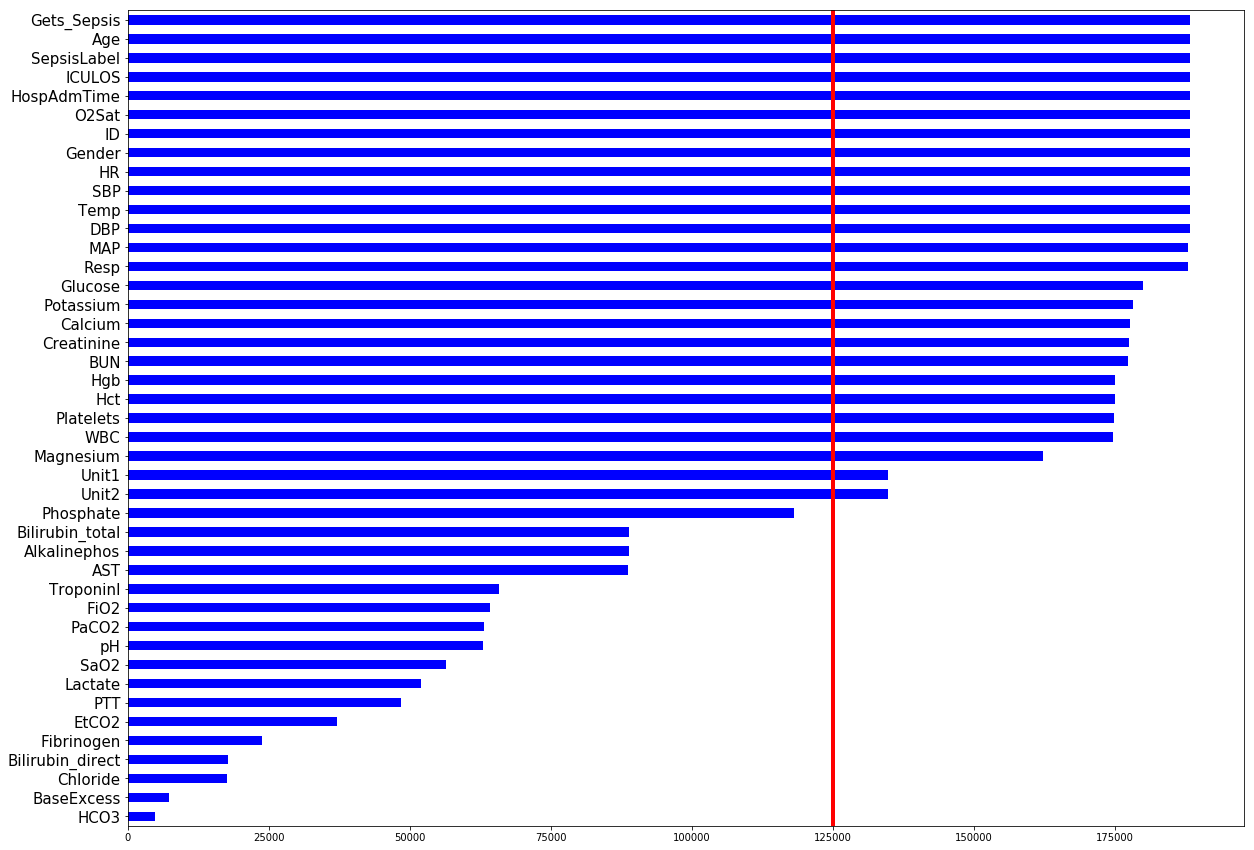

In [15]:
plt.figure(figsize=(20,15))
prelim_df.describe().loc['count'].sort_values().plot(kind = 'barh', color = 'b').tick_params(axis="y", labelsize=15);
plt.axvline(x=125000, linewidth=4, color = 'r');
locs, labels = plt.yticks() 

In [16]:
# Highest # of NaNs: 

HighNaNs = ['Phosphate', 'Bilirubin_total', 'Alkalinephos','AST', 'TroponinI','FiO2','PaCO2',
            'pH','SaO2','Lactate','PTT','EtCO2', 'Fibrinogen', 'Bilirubin_direct', 'Chloride','BaseExcess',
            'HCO3']



In [17]:
# Remove the columns with less than 125,000 NaNs

prelim_df2 = prelim_df.drop(HighNaNs, axis = 1)
prelim_df2.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Gets_Sepsis
count,188439.000000,188453.000000,188350.000000,188363.000000,188007.000000,188302.000000,187969.000000,177444.000000,177687.000000,177483.000000,...,174882.000000,188453.000000,188453.000000,134782.000000,134782.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000
mean,83.824787,97.069290,36.796500,126.518417,86.749469,66.625170,18.642654,22.080203,7.817188,1.606027,...,201.296723,60.554085,0.541180,0.488352,0.511648,-65.130534,25.587913,0.013919,2500.664908,0.082376
std,17.551059,2.871161,0.599552,23.710338,16.300998,13.833184,4.490248,18.839560,2.408893,2.084873,...,100.389161,16.269188,0.498303,0.499866,0.499866,235.957301,27.142730,0.117153,1443.712885,0.274937
min,20.000000,20.000000,30.900000,20.000000,30.000000,20.000000,1.000000,1.000000,1.000000,0.200000,...,2.000000,16.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000,0.000000,0.000000
25%,71.000000,96.000000,36.442857,110.000000,75.096774,57.000000,16.000000,11.000000,7.800000,0.730000,...,137.000000,50.000000,0.000000,0.000000,0.000000,-56.580000,10.000000,0.000000,1242.000000,0.000000
50%,82.000000,97.500000,36.744444,124.000000,85.000000,65.000000,18.000000,16.000000,8.400000,0.950000,...,189.000000,62.000000,1.000000,0.000000,1.000000,-8.800000,20.000000,0.000000,2488.000000,0.000000
75%,95.000000,99.000000,37.110000,141.000000,96.000000,74.750000,21.000000,26.000000,8.800000,1.400000,...,249.000000,72.000000,1.000000,1.000000,1.000000,-3.160000,34.000000,0.000000,3753.000000,0.000000
max,194.000000,100.000000,42.100000,299.000000,296.000000,296.000000,100.000000,268.000000,27.900000,41.900000,...,2322.000000,101.000000,1.000000,1.000000,1.000000,0.000000,336.000000,1.000000,4999.000000,1.000000


In [18]:
clean2 = prelim_df2.dropna()

# Check how many patients we were able to preserve? How many rows?
print(clean2.ID.nunique())
print(clean2.shape)

2948
(117518, 26)


In [19]:
# Add the latent variables
# Shock index = HR/SBP
# O2 Delivery index = HR*(SBP-DBP)*Hgb*SPO2

clean2['ShockIndex'] = clean2['HR']/clean2['SBP']
clean2['O2DeliveryIndex'] = clean2['HR']*(clean2['SBP']-clean2['DBP'])*clean2['Hgb']*clean2['O2Sat']
clean2.head()

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Gets_Sepsis,ShockIndex,O2DeliveryIndex
0,83.323529,98.205882,37.3,105.848485,71.515152,62.272727,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,1,0,0,0,0.787196,3.494429e+06
1,83.000000,100.000000,37.3,103.000000,68.000000,58.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,2,0,0,0,0.805825,3.660300e+06
2,80.000000,99.000000,36.7,103.000000,69.000000,58.000000,10.000000,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,3,0,0,0,0.776699,3.492720e+06
3,87.000000,99.000000,37.3,107.000000,76.000000,67.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,4,0,0,0,0.813084,3.376296e+06
4,91.000000,99.000000,37.3,106.000000,76.000000,68.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,5,0,0,0,0.858491,3.354952e+06


In [20]:
clean2.drop(['ShockIndex','O2DeliveryIndex'], axis = 1, inplace=True)
clean2.head()

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Gets_Sepsis
0,83.323529,98.205882,37.3,105.848485,71.515152,62.272727,13.931034,11.0,8.2,0.61,...,125.0,54,1,1.0,0.0,-5.76,1,0,0,0
1,83.000000,100.000000,37.3,103.000000,68.000000,58.000000,13.931034,11.0,8.2,0.61,...,125.0,54,1,1.0,0.0,-5.76,2,0,0,0
2,80.000000,99.000000,36.7,103.000000,69.000000,58.000000,10.000000,11.0,8.2,0.61,...,125.0,54,1,1.0,0.0,-5.76,3,0,0,0
3,87.000000,99.000000,37.3,107.000000,76.000000,67.000000,13.931034,11.0,8.2,0.61,...,125.0,54,1,1.0,0.0,-5.76,4,0,0,0
4,91.000000,99.000000,37.3,106.000000,76.000000,68.000000,13.931034,11.0,8.2,0.61,...,125.0,54,1,1.0,0.0,-5.76,5,0,0,0


In [27]:
# Need to define model, param grid

def make_model(X, y, model, param_grid):
    
    skf = StratifiedKFold(n_splits=5)
    for train_index, test_index in skf.split(X_IDs, y_outcomes):
        X_train3 = clean2.loc[clean2['ID'].isin(list(train_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
        X_test3 =  clean2.loc[clean2['ID'].isin(list(test_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
        y_train3 = clean2.loc[clean2['ID'].isin(list(train_index))]['Gets_Sepsis']
        y_test3 = clean2.loc[clean2['ID'].isin(list(test_index))]['Gets_Sepsis']
    

    # Instantiate the GridSearchCV object: logreg_cv
    model_cv = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

    # Fit it to the training data
    model_cv.fit(X_train3, y_train3)

    # Print the optimal parameters and best score
    print("Tuned Model Parameter: {}".format(model_cv.best_params_))
    print("Tuned AUROC {}".format(model_cv.best_score_))
    y_pred = model_cv.predict(X_test3)
    print(classification_report(y_test3, y_pred))
        

In [25]:
# Define the X and y

X_IDs = pd.Series(clean2['ID'].unique())
y_outcomes = clean2[['ID','Gets_Sepsis']].drop_duplicates().reset_index()['Gets_Sepsis']

In [28]:
# Setup for Logreg model
c_space = np.logspace(-10, 8, 10)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

make_model(X_IDs,y_outcomes,logreg,param_grid=param_grid)

Tuned Model Parameter: {'C': 0.01, 'penalty': 'l2'}
Tuned AUROC 0.7419910596937985
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     13307
          1       0.83      0.17      0.29       999

avg / total       0.93      0.94      0.92     14306



In [29]:
# Set up param grid
param_grid = {'min_samples_split': range(10,500,20),'max_depth': range(1,20,2)}

# Instantiate the DT classifier: tree
tree = DecisionTreeClassifier()

make_model(X_IDs,y_outcomes,tree,param_grid=param_grid)

Tuned Model Parameter: {'max_depth': 19, 'min_samples_split': 490}
Tuned AUROC 0.7340452922973144
             precision    recall  f1-score   support

          0       0.95      0.98      0.96     13307
          1       0.47      0.29      0.36       999

avg / total       0.91      0.93      0.92     14306



In [30]:
N = [1,2,3,4,5,6,7,8,9,10]
param_grid = {'n_neighbors': N}

# Instantiate the kNN classifier: knn
knn = KNeighborsClassifier()

make_model(X_IDs, y_outcomes, knn, param_grid=param_grid)

Tuned Model Parameter: {'n_neighbors': 10}
Tuned AUROC 0.6296510768563239
             precision    recall  f1-score   support

          0       0.94      0.98      0.96     13307
          1       0.24      0.10      0.14       999

avg / total       0.89      0.92      0.90     14306



In [31]:
# Instantiate the RF classifier: forest
forest = RandomForestClassifier()

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": range(10,500,20),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

make_model(X_IDs, y_outcomes, forest, param_grid=param_grid)

Tuned Model Parameter: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 270}
Tuned AUROC 0.7723556088265632
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     13307
          1       0.65      0.22      0.33       999

avg / total       0.92      0.94      0.92     14306



In [41]:
# Make a new function, make_scaled_model, that implements a StandardScaler step to the dataset

def make_scaled_model(X, y, model, param_grid):
    
    steps = [('scaler', StandardScaler()),
        ('model', model)]
    
    # Create the pipeline: pipeline
    pipeline = Pipeline(steps)
    
    skf = StratifiedKFold(n_splits=5)
    for train_index, test_index in skf.split(X_IDs, y_outcomes):
        X_train3 = clean2.loc[clean2['ID'].isin(list(train_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
        X_test3 =  clean2.loc[clean2['ID'].isin(list(test_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
        y_train3 = clean2.loc[clean2['ID'].isin(list(train_index))]['Gets_Sepsis']
        y_test3 = clean2.loc[clean2['ID'].isin(list(test_index))]['Gets_Sepsis']
    
    # Instantiate the GridSearchCV object
    model_scaled = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

    # Fit the pipeline to the training set
    model_scaled.fit(X_train3, y_train3)

    # Print the optimal parameters and best score
    print("Tuned Scaled Model Parameter: {}".format(model_scaled.best_params_))
    print("Tuned Scaled Model ROC_AUC: {}".format(model_scaled.best_score_))
    y_pred = model_scaled.predict(X_test3)
    print(classification_report(y_test3, y_pred)) 

In [42]:
# KNN with StandardScaler
N = [5,6,7,8,9,10]
param_grid = {'model__n_neighbors': N}
knn = KNeighborsClassifier()

make_scaled_model(X_IDs, y_outcomes, knn, param_grid)

Tuned Scaled Model Parameter: {'model__n_neighbors': 10}
Tuned Scaled Model ROC_AUC: 0.630915494331331
             precision    recall  f1-score   support

          0       0.94      0.99      0.96     13307
          1       0.43      0.14      0.21       999

avg / total       0.90      0.93      0.91     14306



In [81]:
clean2.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Gets_Sepsis,ShockIndex,O2DeliveryIndex
0,83.323529,98.205882,37.3,105.848485,71.515152,62.272727,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,1,0,0,0,0.787196,3.494429e+06
1,83.000000,100.000000,37.3,103.000000,68.000000,58.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,2,0,0,0,0.805825,3.660300e+06
2,80.000000,99.000000,36.7,103.000000,69.000000,58.000000,10.000000,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,3,0,0,0,0.776699,3.492720e+06
3,87.000000,99.000000,37.3,107.000000,76.000000,67.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,4,0,0,0,0.813084,3.376296e+06
4,91.000000,99.000000,37.3,106.000000,76.000000,68.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,5,0,0,0,0.858491,3.354952e+06


In [39]:
# Add the latent variables
# Shock index = HR/SBP
# O2 Delivery index = HR*(SBP-DBP)*Hgb*SPO2

clean2['ShockIndex'] = clean2['HR']/clean2['SBP']
clean2['O2DeliveryIndex'] = clean2['HR']*(clean2['SBP']-clean2['DBP'])*clean2['Hgb']*clean2['O2Sat']
clean2.head()

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Gets_Sepsis,ShockIndex,O2DeliveryIndex
0,83.323529,98.205882,37.3,105.848485,71.515152,62.272727,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,1,0,0,0,0.787196,3.494429e+06
1,83.000000,100.000000,37.3,103.000000,68.000000,58.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,2,0,0,0,0.805825,3.660300e+06
2,80.000000,99.000000,36.7,103.000000,69.000000,58.000000,10.000000,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,3,0,0,0,0.776699,3.492720e+06
3,87.000000,99.000000,37.3,107.000000,76.000000,67.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,4,0,0,0,0.813084,3.376296e+06
4,91.000000,99.000000,37.3,106.000000,76.000000,68.000000,13.931034,11.0,8.2,0.61,...,1,1.0,0.0,-5.76,5,0,0,0,0.858491,3.354952e+06


In [121]:
# Add the trend features

features = list(clean2.columns)[:17]+['ShockIndex','O2DeliveryIndex']

for column in features:
    clean2[str(column)+'_lag'] = clean2[column].shift()
    clean2[str(column)+'_rolling'] = clean2[column].rolling(3).mean()
clean2.head()

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,...,Hgb_lag,Hgb_rolling,WBC_lag,WBC_rolling,Platelets_lag,Platelets_rolling,ShockIndex_lag,ShockIndex_rolling,O2DeliveryIndex_lag,O2DeliveryIndex_rolling
0,83.323529,98.205882,37.3,105.848485,71.515152,62.272727,13.931034,11.0,8.2,0.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83.000000,100.000000,37.3,103.000000,68.000000,58.000000,13.931034,11.0,8.2,0.61,...,9.8,NaN,6.1,NaN,125.0,NaN,0.787196,NaN,3.494429e+06,NaN
2,80.000000,99.000000,36.7,103.000000,69.000000,58.000000,10.000000,11.0,8.2,0.61,...,9.8,9.8,6.1,6.1,125.0,125.0,0.805825,0.789907,3.660300e+06,3.549150e+06
3,87.000000,99.000000,37.3,107.000000,76.000000,67.000000,13.931034,11.0,8.2,0.61,...,9.8,9.8,6.1,6.1,125.0,125.0,0.776699,0.798536,3.492720e+06,3.509772e+06
4,91.000000,99.000000,37.3,106.000000,76.000000,68.000000,13.931034,11.0,8.2,0.61,...,9.8,9.8,6.1,6.1,125.0,125.0,0.813084,0.816091,3.376296e+06,3.407989e+06


In [122]:
clean2.dropna(inplace=True)

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X_IDs, y_outcomes):
    X_train3 = clean2.loc[clean2['ID'].isin(list(train_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
    X_test3 =  clean2.loc[clean2['ID'].isin(list(test_index))].drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
    y_train3 = clean2.loc[clean2['ID'].isin(list(train_index))]['Gets_Sepsis']
    y_test3 = clean2.loc[clean2['ID'].isin(list(test_index))]['Gets_Sepsis']

In [49]:
clean2_IDs = list(clean2['ID'].unique())

patients = []
for ID in clean2_IDs:
    patients.append(clean2[clean2['ID']==ID])

In [45]:
best_model = RandomForestClassifier(bootstrap=True, criterion='gini', 
                                    max_depth=None, max_features=10, min_samples_split=310)
best_model.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=310,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
# Going from timepoint predictions to patient predictions (FOCUS ON THIS ONE)

def predict_patient(model, patients):
    '''Takes in an entire patient file, predicts risk of Sepsis based on 
    timepoint, and infers whether the patient is at risk of getting Sepsis, based on
    multiple thresholds of positive timestamps'''
    

    # Establish the potential thresholds to iterate through
    #pct_threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    pct_threshold = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
    
    # Initiate lists for data viz
    accuracy_score_list = [] 
    precision_list = []
    recall_list = []
    f1_score_list = [] 
    
    for pct in pct_threshold: 
        # Initiate the parameter variables
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        accuracy = 0

        for patient in patients: 
            if 1 not in list(patient['SepsisLabel']):
                gets_sepsis = False
            else:
                gets_sepsis = True
            
            # Generate predictions per timepoint (rows) 
            X = patient.drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
            outcomes = model.predict(X)
            if sum(outcomes)/len(outcomes) >= pct:
                outcome = True
                if outcome == gets_sepsis:
                    tp += 1
                    accuracy += 1
                else:
                    fp += 1
            else:
                outcome = False
                if outcome == gets_sepsis:
                    tn += 1
                    accuracy += 1
                else:
                    fn += 1
                    
        accuracy_score = accuracy/len(patients)
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1_score = 2*((precision*recall)/(precision+recall))
        
        accuracy_score_list.append(accuracy_score) 
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)
        
        print('Accuracy with positive threshold set at {}: {})'.format(pct, accuracy_score))
        print('Precision with positive threshold set at {}: {})'.format(pct, precision))
        print('Recall with positive threshold set at {}: {})'.format(pct, recall))
        print('F1-Score with positive threshold set at {}: {})'.format(pct, f1_score))
        print(" ")
    
    # set width of bar
    barWidth = 0.15
    
    # Make the grouped bar plot 
    # Set position of bar on X axis
    r1 = np.arange(len(accuracy_score_list))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    # Make the plot
    plt.figure(figsize=(20,10))
    plt.bar(r1, accuracy_score_list, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
    plt.bar(r2, precision_list, color='orange', width=barWidth, edgecolor='white', label='Precision')
    plt.bar(r3, recall_list, color='green', width=barWidth, edgecolor='white', label='Recall')
    plt.bar(r4, f1_score_list, color='red', width=barWidth, edgecolor='white', label='F1')
 
    # Add xticks on the middle of the group bars
    plt.xlabel('% threshold', fontweight='bold')
    plt.ylabel('Score', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(accuracy_score_list))], pct_threshold)
 
    # Create legend & Show graphic
    plt.legend()
    plt.show()


Accuracy with positive threshold set at 0.01: 0.9613297150610584)
Precision with positive threshold set at 0.01: 0.6607142857142857)
Recall with positive threshold set at 0.01: 0.49333333333333335)
F1-Score with positive threshold set at 0.01: 0.5648854961832062)
 
Accuracy with positive threshold set at 0.02: 0.9637042062415196)
Precision with positive threshold set at 0.02: 0.7171717171717171)
Recall with positive threshold set at 0.02: 0.47333333333333333)
F1-Score with positive threshold set at 0.02: 0.570281124497992)
 
Accuracy with positive threshold set at 0.03: 0.9643826322930801)
Precision with positive threshold set at 0.03: 0.7368421052631579)
Recall with positive threshold set at 0.03: 0.4666666666666667)
F1-Score with positive threshold set at 0.03: 0.5714285714285714)
 
Accuracy with positive threshold set at 0.04: 0.9647218453188603)
Precision with positive threshold set at 0.04: 0.7555555555555555)
Recall with positive threshold set at 0.04: 0.4533333333333333)
F1-Scor

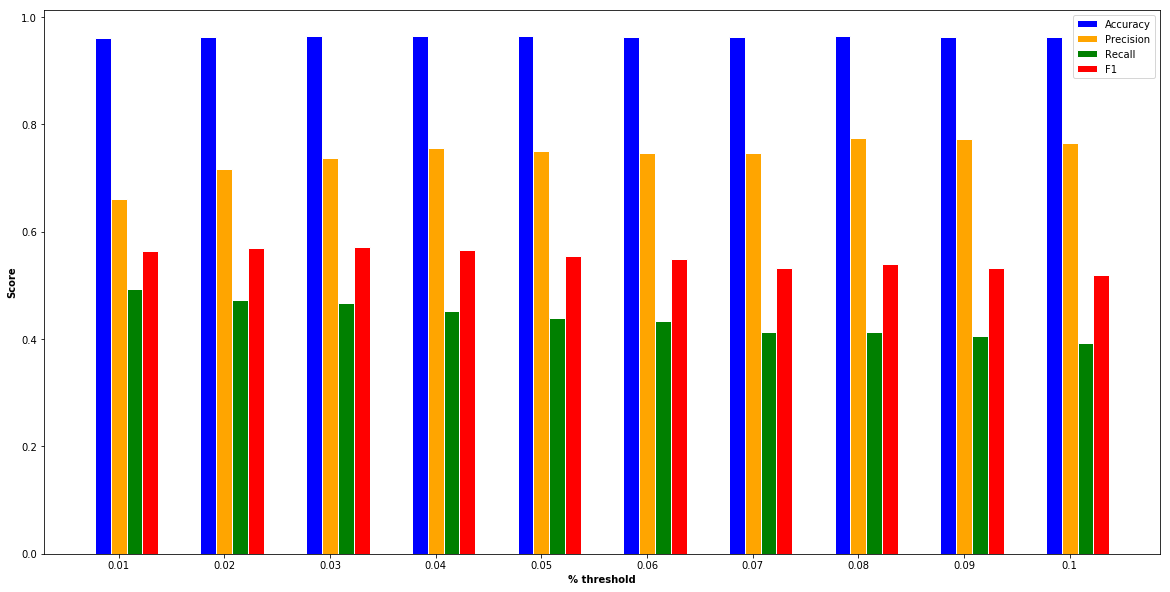

In [84]:
predict_patient(best_model, patients)

In [80]:
def make_roc_curve(model, patients):
    '''Takes in an entire patient file, predicts risk of Sepsis based on 
    timepoint, and generates a sepsis prediction score to create an ROC curve
    and obtain the AUROC'''
    
    sepsis_status = []
    df_roc = pd.DataFrame()
    
    
    # Make the sepsis_status column
    for patient in patients: 
        if 1 not in list(patient['SepsisLabel']):
            gets_sepsis = 0
        else:
            gets_sepsis = 1
        sepsis_status.append(gets_sepsis)
        
    df_roc['Sepsis_status'] = sepsis_status
    
    # Make the sepsis score column   
    sepsis_score = []
    for patient in patients:
        # Generate predictions per timepoint (rows) 
        X = patient.drop(['SepsisLabel','ID','Gets_Sepsis'], axis = 1)
        outcomes = model.predict(X)
        ratio = sum(outcomes)/len(outcomes)            
        sepsis_score.append(ratio)
        
    df_roc['Sepsis_score'] = sepsis_score
    fpr, tpr, _ = roc_curve(df_roc['Sepsis_status'], df_roc['Sepsis_score'])
    
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show();
            

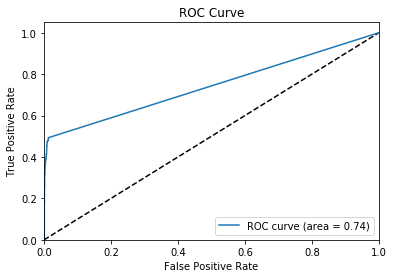

In [81]:
make_roc_curve(best_model, patients)

In [ ]:
# Going from timepoint predictions to patient predictions

def predict_patient(model, patients):
    '''Takes in an entire patient file, predicts risk of Sepsis based on 
    timepoint, and infers whether the patient is at risk of getting Sepsis, based on
    multiple thresholds of positive timestamps'''
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    accuracy = 0
    
    #VS_features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp']
    #LV_features = ['BUN', 'Calcium', 'Creatinine', 'Glucose', 'Magnesium',
    #           'Potassium', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age', 'Gender', 
    #           'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 
    #           'Gets_Sepsis', 'ShockIndex', 'O2DeliveryIndex']
    #HighNaNs = ['Phosphate', 'Bilirubin_total', 'Alkalinephos','AST', 'TroponinI','FiO2','PaCO2',
    #        'pH','SaO2','Lactate','PTT','EtCO2', 'Fibrinogen', 'Bilirubin_direct', 'Chloride','BaseExcess',
    #        'HCO3']
    
    

    # Establish the potential thresholds to iterate through
    pct_threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    
    for pct in pct_threshold: 
        for patient in patients:
        
            # Clean and format data that the model can fit in
            #patient.drop(HighNaNs, axis = 1, inplace=True)
            
            # Filling NaN values for remaining VS features with mean
            # for feature in VS_features:
            #    patient[feature].fillna((patient[feature].mean()), inplace = True)
                
            # Filling NaN values for remaining LV features with ffill/bfill
            #patient[LV_features] = patient[LV_features].fillna(method='ffill')
            #patient[LV_features] = patient[LV_features].fillna(method='bfill')
            
            # Add the latent variables
            # Shock index = HR/SBP
            # O2 Delivery index = HR*(SBP-DBP)*Hgb*SPO2

            #patient['ShockIndex'] = patient['HR']/patient['SBP']
            #patient['O2DeliveryIndex'] = patient['HR']*(patient['SBP']-patient['DBP'])*patient['Hgb']*patient['O2Sat']

            if 1 not in list(patient['SepsisLabel']):
                gets_sepsis = False
            else:
                gets_sepsis = True
            
            # Generate predictions per timepoint (rows)
            X = patient.drop('SepsisLabel', axis = 1)
            outcomes = list(model.predict(X))
            if sum(outcomes)/len(outcomes) >= pct:
                outcome = True
                if outcome == gets_sepsis:
                    tp += 1
                    accuracy += 1
                else:
                    fp += 1
            else:
                outcome = False
                if outcome == gets_sepsis:
                    tn += 1
                    accuracy += 1
                else:
                    fn += 1
                    
        accuracy_score = accuracy/patients 
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1_score = 2*((precision*recall)/(precision+recall))
    
        print('Accuracy with positive threshold set at {}: {})'.format(pct_threshold,accuracy_score))
        print('Precision with positive threshold set at {}: {})'.format(pct_threshold,precision))
        print('Recall with positive threshold set at {}: {})'.format(pct_threshold,recall))
        print('F1-Score with positive threshold set at {}: {})'.format(pct_threshold,f1_score))

In [ ]:
# NOTES 


# https://tbiomed.biomedcentral.com/articles/10.1186/1742-4682-8-40
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6299613/pdf/13054_2018_Article_2279.pdf

# Standardize Candidate Feature Formatting
# There are fixed intervals (vital signs like HR and temp), and non-standard intervals (platelets and WBC)

# Vital signs (columns 1-8) -> Time Series features 
# Laboratory values (columns 9-34) -> Multivariate features 
# Personal info (columns 35-40) -> Demographic features

# Time Series
# Fill NaN values with mean values 


# Notes:
# Deal with the imbalance
# create a was_analyzed features
# a lag

# Notes: 
# Systolic should always be greater than diastolic by definition. 

# 'HR'
# 'O2Sat'
# 'Temp',
# 'SBP',
# 'MAP',
# 'DBP',
# 'Resp',
# 'EtCO2',

# Multivariate features 
# Literature says to use the most recent multivariate features before onset of sepsis, but there are some values where
# I may want to forward/backward fill

 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',


# Demographic features

# 'Age' -> One value
# 'Gender', -> One value 
# 'Unit1', -> I say ignore
# 'Unit2', -> I say ignore
# 'HospAdmTime', -> I say ignore 
# 'ICULOS', -> Must be useful somewhere


# Clinical latent features (can be treated like time series)

# Shock index = HR/SBP
# O2 Delivery index = HR*(SBP-DBP)*Hgb*SPO2

# Trend features of time series
# Max, min, mean, mode, median, slope, intercept

# Predictor variable

# SepsisLabel